In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../utils')
from dataPiping import *

import numpy as np
import pandas as pd
from math import exp, fabs, sqrt, log, pi
import datetime

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
import seaborn as sns

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import Callback, LambdaCallback, TensorBoard, ReduceLROnPlateau
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [4]:
from sklearn.metrics import mean_squared_error

In [5]:
seed = 42
np.random.seed(seed)

In [6]:
X, y = readAggrData()
X_train, X_test, y_train, y_test = splitAndNormaliseAggr(X,y)

## 2 hidden layers

In [7]:
def model():
    model = Sequential()
    model.add(Dense(X.shape[1], input_dim=X.shape[1], init='normal', activation='relu'))
    model.add(Dense(6, init='normal', activation='relu'))
    model.add(Dense(1, init='normal')) # no activation/linear activation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [27]:
nn = model()

In [28]:
hist = nn.fit(
    X_train, y_train,
    batch_size=100, nb_epoch=1000, 
    verbose=0
)

In [33]:
str(datetime.timedelta(seconds=sqrt(mean_squared_error(y_test, nn.predict(X_test)))))

'35 days, 16:22:30.998900'

In [32]:
str(datetime.timedelta(seconds=sqrt(mean_squared_error(y_train, nn.predict(X_train)))))

'35 days, 7:42:42.976919'

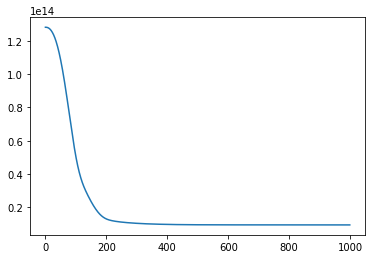

In [30]:
plt.plot(hist.history['loss'])

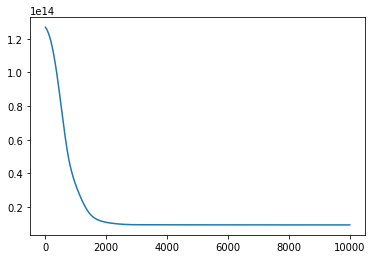

In [18]:
plt.plot(hist.history['loss'])

In [31]:
rmse = sqrt(mean_squared_error(y_test, nn.predict(X_test)))
str(datetime.timedelta(seconds=rmse))

'35 days, 16:22:30.998900'

In [34]:
rmse

3082950.998900366

## Use dropout

In [9]:
def model_dropout():
    model = Sequential()
    model.add(Dense(X.shape[1], input_dim=X.shape[1], init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(6, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, init='normal')) # no activation/linear activation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [13]:
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

def fit_model(model, batch_size=1000, nb_epoch=10000, log_every=1000):
    hist = model.fit(
    X_train, y_train, validation_split=.2,
    batch_size=batch_size, nb_epoch=nb_epoch, verbose=0
        , callbacks=[TensorBoard(log_dir='../../logs/no_dropout', histogram_freq=100)]#, reduce_lr]
    # , callbacks=[LambdaCallback(on_epoch_end=lambda epoch, logs: print(epoch, logs) if (epoch % log_every== 0) else 0)]
    )
    return hist

In [11]:
model = model_dropout()

In [12]:
fit_model(model)

INFO:tensorflow:Summary name dense_4_W:0 is illegal; using dense_4_W_0 instead.
INFO:tensorflow:Summary name dense_4_b:0 is illegal; using dense_4_b_0 instead.
INFO:tensorflow:Summary name dense_5_W:0 is illegal; using dense_5_W_0 instead.
INFO:tensorflow:Summary name dense_5_b:0 is illegal; using dense_5_b_0 instead.
INFO:tensorflow:Summary name dense_6_W:0 is illegal; using dense_6_W_0 instead.
INFO:tensorflow:Summary name dense_6_b:0 is illegal; using dense_6_b_0 instead.


In [17]:
y_pred = model.predict(X_test).reshape((-1,))

In [18]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
str(datetime.timedelta(seconds=rmse))

'35 days, 21:42:52.647161'

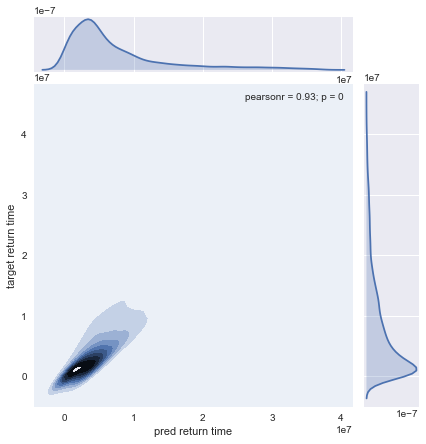

In [21]:
g = sns.jointplot(y_pred, y_test, kind="kde")
g.set_axis_labels("pred return time", "target return time")

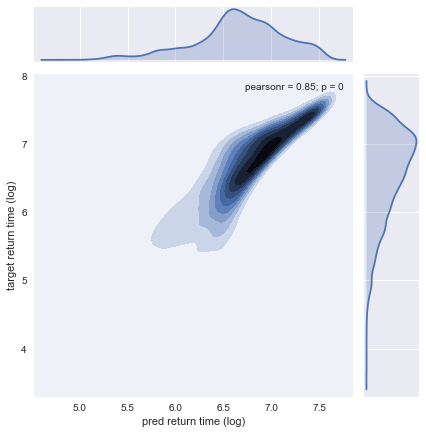

In [22]:
grid = sns.jointplot(np.log10(y_pred), np.log10(y_test), kind="kde")
grid.set_axis_labels("pred return time (log)", "target return time (log)")

## No dropout

In [14]:
def no_dropout_model():
    m = Sequential()
    m.add(Dense(X.shape[1], input_dim=X.shape[1], init='normal', activation='relu'))
    m.add(Dense(6, init='normal', activation='relu'))
    m.add(Dense(1, init='normal')) # no activation/linear activation
    m.compile(loss='mean_squared_error', optimizer='adam')
    return m

In [15]:
no_dr_model = no_dropout_model()

In [16]:
fit_model(no_dr_model)

INFO:tensorflow:Summary name dense_7_W:0 is illegal; using dense_7_W_0 instead.
INFO:tensorflow:Summary name dense_7_b:0 is illegal; using dense_7_b_0 instead.
INFO:tensorflow:Summary name dense_8_W:0 is illegal; using dense_8_W_0 instead.
INFO:tensorflow:Summary name dense_8_b:0 is illegal; using dense_8_b_0 instead.
INFO:tensorflow:Summary name dense_9_W:0 is illegal; using dense_9_W_0 instead.
INFO:tensorflow:Summary name dense_9_b:0 is illegal; using dense_9_b_0 instead.


InvalidArgumentError: You must feed a value for placeholder tensor 'keras_learning_phase' with dtype bool
	 [[Node: keras_learning_phase = Placeholder[dtype=DT_BOOL, shape=[], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: dense_4_W/read/_165 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_78_dense_4_W/read", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'keras_learning_phase', defined at:
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\tornado\ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-aea97f67399e>", line 1, in <module>
    nn_dp = model_dropout()
  File "<ipython-input-7-ca0301a393cb>", line 4, in model_dropout
    model.add(Dropout(0.2))
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py", line 332, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\topology.py", line 572, in __call__
    self.add_inbound_node(inbound_layers, node_indices, tensor_indices)
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\topology.py", line 635, in add_inbound_node
    Node.create_node(self, inbound_layers, node_indices, tensor_indices)
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\topology.py", line 166, in create_node
    output_tensors = to_list(outbound_layer.call(input_tensors[0], mask=input_masks[0]))
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\keras\layers\core.py", line 111, in call
    x = K.in_train_phase(dropped_inputs, lambda: x)
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py", line 2255, in in_train_phase
    if learning_phase() is 1:
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py", line 76, in learning_phase
    name='keras_learning_phase')
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1520, in placeholder
    name=name)
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 2149, in _placeholder
    name=name)
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 2395, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 1264, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'keras_learning_phase' with dtype bool
	 [[Node: keras_learning_phase = Placeholder[dtype=DT_BOOL, shape=[], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: dense_4_W/read/_165 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_78_dense_4_W/read", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
